## Задание 2

- решите задачу классификации на ваших данных с использованием рассмотренных моделей sklearn: knn, NB, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры.
- вычислите значения метрик Accuracy, Precision, Recall, F1, ROC AUC score


# Импорт

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve


# Загружаем датасет и разбиваем её на выборку.

In [4]:
models = pd.read_csv('../../Data/neo_task_moded_norm.csv')
X_train, X_test, y_train, y_test = train_test_split(models.drop('hazardous', axis=1), models['hazardous'], test_size=0.25, random_state=42)


# Метод k-ближайших соседей

In [29]:
knn_optimal_n_neighbors = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': np.arange(1, 50, 1)}, cv=2, scoring='accuracy', return_train_score=False,verbose=1).fit(X_train, y_train)
knn_optimal_n_neighbors.best_params_

Fitting 2 folds for each of 49 candidates, totalling 98 fits


{'n_neighbors': 33}

In [46]:
knn = KNeighborsClassifier(n_neighbors=knn_optimal_n_neighbors.best_params_['n_neighbors'], metric='minkowski', p=5)
knn.fit(X_train, y_train)
y_predicted_by_kn_neighbors = knn.predict(X_test)

## Оценка качества 

In [47]:
print('Accuracy')
print(accuracy_score(y_test, y_predicted_by_kn_neighbors))

Accuracy
0.9113126954071074


In [48]:
print('Confusion matrix')
print(confusion_matrix(y_test, y_predicted_by_kn_neighbors))

Confusion matrix
[[20368   153]
 [ 1861   327]]


In [49]:
print('Precision, Recall, F\n', classification_report(y_test, y_predicted_by_kn_neighbors))

Precision, Recall, F
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     20521
         1.0       0.68      0.15      0.25      2188

    accuracy                           0.91     22709
   macro avg       0.80      0.57      0.60     22709
weighted avg       0.89      0.91      0.88     22709



ROC AUC score


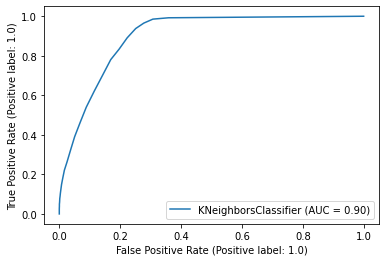

In [50]:
print('ROC AUC score') 
plot_roc_curve(knn, X_test, y_test)